# 7CS034 Data Science Personal Poster Model Implementation

## Umolu John Chukwuemeka (2065655)

# 

### Installing the NetworkX and Matplotlib libraries 

In [151]:
#pip install networkx
#pip install matplotlib
#pip install numpy

### Importing the Networkx and Matplotlib libraries

In [152]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

### Assign network parameters (m>=1 and m < n)

In [153]:
n = 50
m = 2

Where,
- n is the Number of nodes which is an integer value
- m is the Number of edges to attach from a new node to existing nodes

### Variables to be used

In [154]:
# Stores the number of nodes
n_row = n
# Stores the number of edges
n_edges = m
# initialize graph
G = nx.Graph()
G2 = nx.Graph()

### Barabasi Albert Model (Growth Phase + Preferential Attachment)

In [155]:
def barabasi_albert_graph(n, m, seed=None):
    # Add m initial nodes (m0 in barabasi-speak)
    G=empty_graph(m)
    G.name="barabasi_albert_graph(%s,%s)"%(n,m)
    # Target nodes for new edges
    targets=list(range(m))
    # List of existing nodes, with nodes repeated once for each adjacent edge
    repeated_nodes=[]
    # Start adding the other n-m nodes. The first node is m.
    source=m
    while source<n:
        # Add edges to m nodes from the source.
        G.add_edges_from(zip(*m,targets))
        # Add one node to the list for each new edge just created.
        repeated_nodes.extend(targets)
        # And the new node "source" has m edges to add to the list.
        repeated_nodes.extend(*m)
        # Now choose m unique nodes from the existing nodes
        # Pick uniformly from repeated_nodes (preferential attachment)
        targets = _random_subset(repeated_nodes,m)
        source += 1
    return G

### Create Barabasi-Albert scale free graph

In [156]:
# Create the network graph
G= nx.barabasi_albert_graph(n,m)
# Get all the node positions of the graph
node_pos = nx.spring_layout(G) 

### Network plots

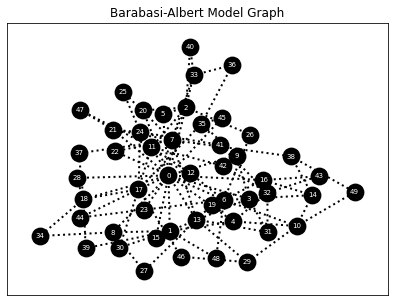

In [157]:
fig1 = plt.figure(figsize=(15, 5))
plt.clf()
plt.subplot(1,2,1)
plt.title('Barabasi-Albert Model Graph')
nx.draw_networkx_nodes(G, node_pos, node_color='#000000', node_size=250, linewidths=2.0)
nx.draw_networkx_labels(G, node_pos, font_size=7, font_color='w')
nx.draw_networkx_edges(G, node_pos, width=2.0, style='dotted')
fig1.savefig("Network_plot_n" + str(n_row) + "_m" + str(m) + ".png")

## Topological Properties

### Degree of Distribution for each Node in the Network

<Figure size 432x288 with 0 Axes>

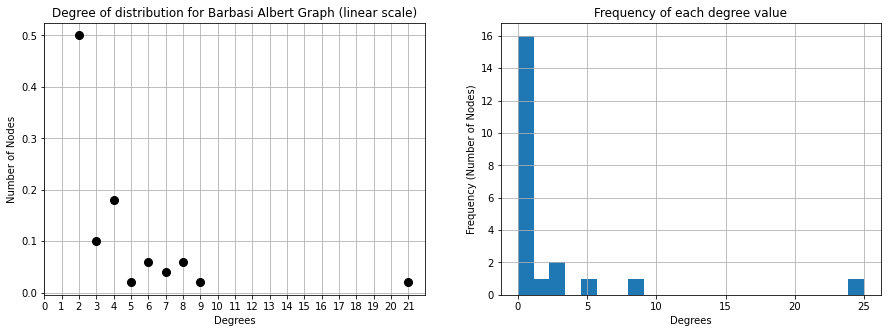

In [158]:
# Get the number of nodes 
nodes = float(nx.number_of_nodes(G))
# Create a dictionary containing all the nodes and its edge connection
degrees = dict(G.degree())
# To get the degree of distribution values
degree_values = sorted(set(degrees.values()))
# Get the number of unique connections made in the Network
for i in range(len(degree_values)):
    unique_connections = list(degrees.values()).count(degree_values[i]) 
    #print('Degree', degree_values[i], ': has', unique_connections, 'portion of Nodes in the Network.', '\n' )
    
node_portion = [list(degrees.values()).count(i)/float(nodes) for i in degree_values]
#print('Fraction of Nodes:', node_portion, '\n')
plt.clf()
fig6 = plt.figure(figsize=(15, 5))
plt.subplot(1,2,1)
# Plot the graph
plt.title('Degree of distribution for Barbasi Albert Graph (linear scale)')
plt.plot(degree_values, node_portion, linewidth=0, color='#000000', marker= 'o', markersize = 8)
plt.ylabel('Number of Nodes')
plt.xlabel('Degrees')
plt.xticks(np.arange(0, degree_values[len(degree_values)-1] + 1, 1))
plt.grid()
# Plot the frequency of each degree value
d1 = nx.degree_histogram(G)
plt.subplot(1,2,2)
plt.title('Frequency of each degree value')
plt.hist(d1, bins=len(d1))
plt.xlabel('Degrees')
plt.ylabel('Frequency (Number of Nodes)')
plt.grid()
plt.show()
fig6.savefig("DegreeDist_n" + str(n_row) + "_m" + str(m) + ".png")
#print('Frequency:', d1)

### Clustering Coefficient

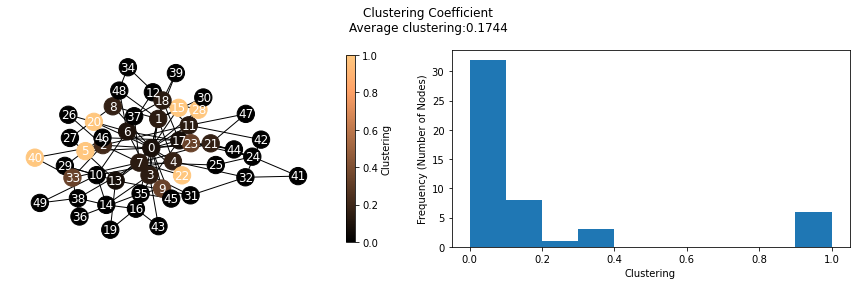

In [159]:
from matplotlib.cm import ScalarMappable

GC = G.subgraph(max(nx.connected_components(G)))
lcc = nx.clustering(GC)

cmap = plt.get_cmap('copper')
norm = plt.Normalize(0, max(lcc.values()))
node_colors = [cmap(norm(lcc[node])) for node in GC.nodes]

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 4))
nx.draw_spring(GC, node_color=node_colors, font_color='w', with_labels=True, ax=ax1)
fig.colorbar(ScalarMappable(cmap=cmap, norm=norm), label='Clustering', shrink=0.95, ax=ax1)

ax2.hist(lcc.values(), bins=10)
ax2.set_xlabel('Clustering')
ax2.set_ylabel('Frequency (Number of Nodes)')
fig.suptitle('Clustering Coefficient' + '\n' + 'Average clustering:' + str(round(nx.average_clustering(G), 4)))
plt.tight_layout()
plt.show()
fig.savefig("Clustering_plot_n" + str(n_row) + "_m" + str(m) + ".png")

### Computting for the Shortest Path between two nodes

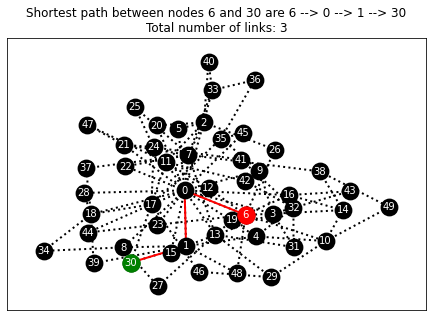

In [160]:
# https://stackoverflow.com/questions/57683321/edge-attributes-of-shortest-path-using-networkx
#Enter start node
st = 6 
#Enter end node
end = 30 
# Gets the shortest between two nodes
path = nx.shortest_path(G)   
# Get a list of all the edges in the graph
path_edges = [list(u) for u in G.edges(data=False)]
# Creates the new edges list
n_edges = []
# Shortest path nodes
s_path = path[st][end]
# Convert shortest path list to string seperating each value with #
new_string = '#'.join(str(x) for x in s_path)
new_val = new_string
new_val2 = new_string[::-1]
# Get all the edge list between nodes
for i in range(len(path_edges)):
    n_path = path_edges[i]
    # Convert graph edges list to string seperating each value with #
    n_string = '#'.join(str(x) for x in n_path)
    # Check if the graph edges value is equal to shortest path values
    if  any(n_string.split('#')[1] == c for c in new_val.split('#')): 
        if any(n_string.split('#')[0] == c for c in new_val.split('#')):
            n_edges.append(n_path)

# Check if number of edges > 0
if len(n_edges) > 0:
    fig5 = plt.figure(figsize=(7.5, 5))
    plt.clf()
    nx.draw_networkx_nodes(G, node_pos, node_color='#000000', node_size=250, linewidths=2.0)
    nx.draw_networkx_labels(G, node_pos, font_size=10, font_color='w')
    nx.draw_networkx_edges(G, node_pos, width=2.0, style='dotted')
    nx.draw_networkx_nodes(G,node_pos, nodelist=[st], node_color="r")
    nx.draw_networkx_nodes(G,node_pos, nodelist=[end], node_color="g")
    nx.draw_networkx_edges(G, node_pos, edgelist = n_edges, width=2.0, edge_color='r')
    # Check if the nodes is greater that 2
    if len(path[st][end]) > 0:
        plt.title('Shortest path between nodes ' + str(st) + ' and ' + str(end) 
                  + ' are ' + ' --> '.join(str(e) for e in (path[st][end])) 
                  + '\n' + 'Total number of links: ' + str(len(n_edges)))
    else:
        plt.title('Shortest path between nodes: No path found!' + '\n' + 'Total number of links: ' + str(len(n_edges)))
    fig5.savefig(str(st) + 's_' + str(end) +"e_ShortestPath_n" + str(n_row) + "_m" + str(m) + ".png")

## Other network properties

### Finding the network size

In [161]:
print('Number of nodes in the graph', nx.number_of_nodes(G))

Number of nodes in the graph 50


### Finding number of edges in the graph

In [162]:
print('Number of edges in the graph', nx.number_of_edges(G))

Number of edges in the graph 96


### Removing a Node from the network (Betweenness)

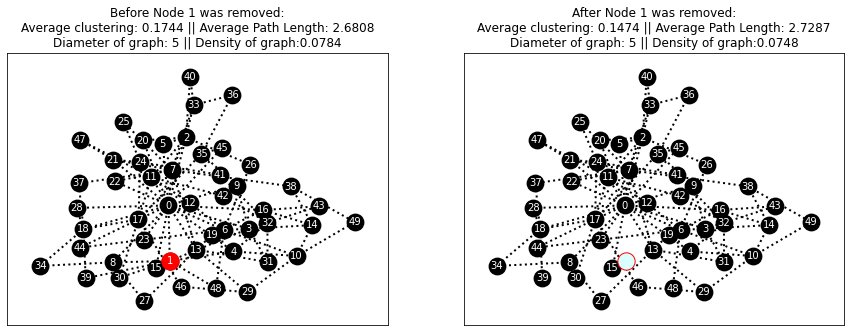

In [163]:
G2 = G
# Enter node id to be removed
node_id = 1

fig2 = plt.figure(figsize=(15, 5))
plt.clf()
plt.subplot(1, 2, 1)
plt.title('Before Node ' + str(node_id) + ' was removed:' + '\n' 
          + 'Average clustering: ' + str(round(nx.average_clustering(G), 4)) + ' || ' 
          + 'Average Path Length: ' + str(round(nx.average_shortest_path_length(G), 4)) + '\n' 
          + 'Diameter of graph: ' + str(nx.diameter(G)) + ' || ' 
          + 'Density of graph:' + str(round(nx.density(G2), 4)))
nx.draw_networkx_nodes(G, node_pos, node_color='#000000', node_size=250, linewidths=2.0)
nx.draw_networkx_labels(G, node_pos, font_size=10, font_color='w')
nx.draw_networkx_edges(G, node_pos, width=2.0, style='dotted')
nx.draw_networkx_nodes(G,node_pos, nodelist=[node_id], node_color="r")
before = list(G.edges)
G2.remove_node(node_id)
after = list(G2.edges)
plt.subplot(1, 2, 2)
plt.title('After Node ' + str(node_id) + ' was removed:' + '\n' 
          + 'Average clustering: ' + str(round(nx.average_clustering(G2), 4)) + ' || ' 
          + 'Average Path Length: ' + str(round(nx.average_shortest_path_length(G2), 4)) + '\n' 
          + 'Diameter of graph: ' + str(nx.diameter(G2)) + ' || ' 
          + 'Density of graph:' + str(round(nx.density(G2), 4)))

nx.draw_networkx_nodes(G2, node_pos, node_color='#000000', node_size=250, linewidths=2.0)
nx.draw_networkx_labels(G2, node_pos, font_size=10, font_color='w')
nx.draw_networkx_edges(G2, node_pos, width=2.0, style='dotted')
nx.draw_networkx_nodes(G2,node_pos, nodelist=[node_id], edgecolors="r", node_color="#D9FFFFFF")

fig2.savefig("Network_betweenness_n" + str(n_row) + "_m" + str(m) + ".png")

### Degree centrality

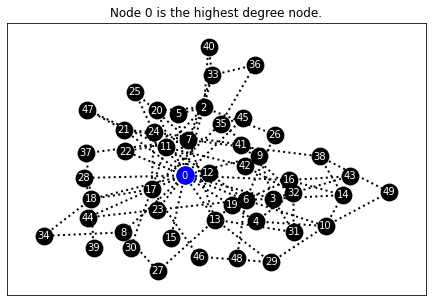

In [164]:
all_centr = dict(nx.degree_centrality(G))
keys_values = [key for key in all_centr.keys()]
obj_values = [all_centr[key] for key in keys_values]
highest_degr = keys_values[np.argmax(np.array(obj_values))]
fig3 = plt.figure(figsize=(7.5, 5))
plt.clf()
nx.draw_networkx_nodes(G, node_pos, node_color='#000000', node_size=250, linewidths=2.0)
nx.draw_networkx_labels(G, node_pos, font_size=10, font_color='w')
nx.draw_networkx_edges(G, node_pos, width=2.0, style='dotted')
nx.draw_networkx_nodes(G,node_pos, nodelist=[highest_degr], node_color="b")
plt.title('Node ' + str(highest_degr) + ' is the highest degree node.')
fig3.savefig("Higest_Degree_node_" + str(n_row) + "_m" + str(m) + ".png")

### Finding the graphs density

In [165]:
print('Density of graph:', nx.density(G))

Density of graph: 0.07482993197278912


### Raduis and diameter of the graph

In [166]:
print('Diameter of the graph: ' + str(nx.diameter(G)) + ', Raduis of graph: ' + str(nx.radius(G, e=None)))

Diameter of the graph: 5, Raduis of graph: 3


### Eccentrity

In [167]:
# eccentrity of node 2 & 5
print(dict(nx.eccentricity(G, v=[2, 5])))

{2: 4, 5: 4}


### Betweenness centrality

In [168]:
print(nx.betweenness_centrality(G, k=None, normalized=True, weight=None, endpoints=False, seed=None))

{0: 0.5261906003536164, 2: 0.08534409331108332, 3: 0.0629261899795379, 4: 0.04377996470455796, 5: 0.0, 6: 0.09922698098151789, 7: 0.14342113322870517, 8: 0.02737462006079027, 9: 0.015200713855282069, 10: 0.04351464876730833, 11: 0.08453436339074637, 12: 0.003014184397163121, 13: 0.09253673987325428, 14: 0.015329657276622234, 15: 0.0, 16: 0.0388329533941236, 17: 0.15510058042129377, 18: 0.08277819993245526, 19: 0.0019661854103343464, 20: 0.0, 21: 0.035292131036811884, 22: 0.0, 23: 0.01517434988179669, 24: 0.036192727682089386, 25: 0.005712456377349995, 26: 0.003371339670620021, 27: 0.002349290780141844, 28: 0.0, 29: 0.015389814318162253, 30: 0.0, 31: 0.01823391590678825, 32: 0.025982213216255767, 33: 0.026803966267358006, 34: 0.0017730496453900709, 35: 0.026379080000794648, 36: 0.0038704548013058647, 37: 0.004514944275582573, 38: 0.02529321125613366, 39: 0.0, 40: 0.0, 41: 0.005437352245862883, 42: 0.006888860745243722, 43: 0.0006501182033096926, 44: 0.002216312056737589, 45: 0.007294998

### Closeness centrality

In [169]:
print(nx.closeness_centrality(G, u=None, distance=None, wf_improved=True))

{0: 0.6075949367088608, 2: 0.4485981308411215, 3: 0.4444444444444444, 4: 0.42105263157894735, 5: 0.39669421487603307, 6: 0.44036697247706424, 7: 0.48, 8: 0.39344262295081966, 9: 0.4067796610169492, 10: 0.35555555555555557, 11: 0.4485981308411215, 12: 0.34532374100719426, 13: 0.4485981308411215, 14: 0.35036496350364965, 15: 0.38095238095238093, 16: 0.41025641025641024, 17: 0.47058823529411764, 18: 0.43243243243243246, 19: 0.32432432432432434, 20: 0.39669421487603307, 21: 0.4247787610619469, 22: 0.40336134453781514, 23: 0.4067796610169492, 24: 0.35555555555555557, 25: 0.35036496350364965, 26: 0.34532374100719426, 27: 0.32, 28: 0.39344262295081966, 29: 0.35294117647058826, 30: 0.3221476510067114, 31: 0.3582089552238806, 32: 0.3333333333333333, 33: 0.3582089552238806, 34: 0.3116883116883117, 35: 0.35294117647058826, 36: 0.3, 37: 0.35555555555555557, 38: 0.34782608695652173, 39: 0.3037974683544304, 40: 0.31788079470198677, 41: 0.2909090909090909, 42: 0.3310344827586207, 43: 0.31788079470198

### Edgebetweenness

In [170]:
print(nx.edge_betweenness_centrality(G, k=None, normalized=True, weight=None, seed=None))

{(0, 2): 0.05606861792335981, (0, 3): 0.05223315516682863, (0, 4): 0.0640735262358912, (0, 5): 0.032950680272108845, (0, 6): 0.07736177804455115, (0, 7): 0.06528266068332095, (0, 8): 0.06056851311953351, (0, 9): 0.03670245876128228, (0, 11): 0.05328798185941042, (0, 13): 0.06333819241982507, (0, 15): 0.04081632653061224, (0, 16): 0.06497408487204406, (0, 17): 0.08381062742557341, (0, 18): 0.0718942338840298, (0, 20): 0.032950680272108845, (0, 21): 0.04557755641939314, (0, 22): 0.030130385487528336, (0, 23): 0.039866780045351456, (0, 28): 0.03500566893424036, (0, 45): 0.04334928415810768, (2, 5): 0.007865646258503401, (2, 7): 0.0243021811899363, (2, 11): 0.02749838030450275, (2, 20): 0.007865646258503401, (2, 26): 0.02487758992485883, (2, 33): 0.022336176534105707, (2, 40): 0.0337234099989202, (3, 6): 0.02017946067315815, (3, 9): 0.014272375616913432, (3, 14): 0.02275848831596131, (3, 31): 0.026574141561386457, (3, 43): 0.025514253320375768, (4, 10): 0.02716538996551002, (4, 32): 0.0335

### Transitivity

In [171]:
print(nx.transitivity(G))

0.09846827133479212


### Finding a node neighbors and non neighbors

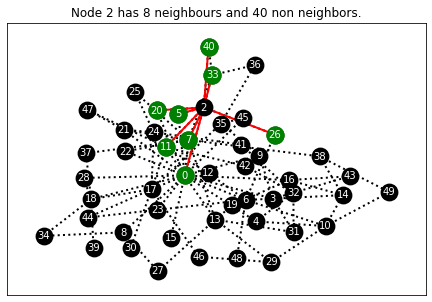

In [172]:
node_id = 2
#https://networkx.org/documentation/stable/reference/classes/generated/networkx.Graph.neighbors.html
dict_value = nx.all_neighbors(G, node_id)
list_value = [item for item in dict_value]
# Non neighbors
dict_value_non = nx.non_neighbors(G, node_id)
list_value_non = [item for item in dict_value_non]
# get the links
new_edges = []
for n in list_value:
    new_edges.append([n, node_id])
                      
if len(new_edges) > 0:
    fig4 = plt.figure(figsize=(7.5, 5))
    plt.clf()
    nx.draw_networkx_nodes(G, node_pos, node_color='#000000', node_size=250, linewidths=2.0)
    nx.draw_networkx_labels(G, node_pos, font_size=10, font_color='w')
    nx.draw_networkx_edges(G, node_pos, width=2.0, style='dotted')
    nx.draw_networkx_nodes(G,node_pos, nodelist=list_value, node_color="g")
    nx.draw_networkx_edges(G, node_pos, edgelist = new_edges, width=2.0, edge_color='r')
    plt.title('Node ' + str(node_id) + ' has ' + str(len(list_value)) + ' neighbours and ' 
              + str(len(list_value_non)) + ' non neighbors.')
    fig4.savefig(str(node_id) + "_Neighbours_n" + str(n_row) + "_m" + str(m) + ".png")

### Finding the common neighbors for two nodes

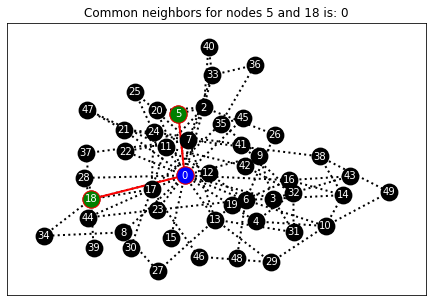

In [173]:
first_node = 5
second_node = 18

common = nx.common_neighbors(G, first_node, second_node)
common_list = [item for item in common]
# get the links
new_edges = []
for n in common_list:
    new_edges.append([first_node, n])
    new_edges.append([second_node, n])
    
fig7 = plt.figure(figsize=(7.5, 5))
plt.clf()
nx.draw_networkx_nodes(G, node_pos, node_color='#000000', node_size=250, linewidths=2.0)
nx.draw_networkx_labels(G, node_pos, font_size=10, font_color='w')
nx.draw_networkx_edges(G, node_pos, width=2.0, style='dotted')
nx.draw_networkx_nodes(G,node_pos, nodelist=[first_node], edgecolors="r", node_color="g")
nx.draw_networkx_nodes(G,node_pos, nodelist=[second_node], edgecolors="r", node_color="g")
nx.draw_networkx_nodes(G,node_pos, nodelist=common_list, edgecolors="r", node_color="b")
nx.draw_networkx_edges(G, node_pos, edgelist = new_edges, width=2.0, edge_color='r')
if len(common_list) > 0:
    plt.title('Common neighbors for nodes ' + str(first_node) + ' and ' + str(second_node) + 
              ' is: ' + ', '.join(str(e) for e in common_list))
else:
    plt.title('Common neighbors for nodes ' + str(first_node) + ' and ' + str(second_node) + 
              ' is: ' + 'None')
fig7.savefig(str(first_node) + '_' + str(second_node) + "Common_Neighbours_n" + str(n_row) + "_m" + str(m) + ".png")

### Size of the network

In [174]:
# Get the number of nodes 
nodes = float(nx.number_of_nodes(G))
print('Total number of nodes on the graph:', nodes)

Total number of nodes on the graph: 49.0


### Network Nodes Characteristics

In [175]:
# Create a dictionary containing all the nodes and its edge connection
degrees = dict(G.degree())
# Get the dictionary keys
dict_keys = list(degrees.keys())
# Get the dictionary objects
dict_objs = [degrees[key] for key in degrees.keys()]

new_array = np.array(dict_objs)
max_index = np.argmax(new_array)

print('Nodes and the number of edges made to an existing Node in the network:', '\n')
print('Node ID:','\n', dict_keys, '\n')
print('Number of Edges:','\n', dict_objs, '\n')
print('Node', dict_keys[max_index], 'has the higest number of connected edges of value',new_array[max_index])

Nodes and the number of edges made to an existing Node in the network: 

Node ID: 
 [0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49] 

Number of Edges: 
 [20, 8, 6, 3, 2, 7, 9, 3, 3, 5, 6, 2, 6, 4, 1, 4, 8, 6, 2, 2, 4, 2, 3, 4, 2, 2, 2, 2, 3, 1, 3, 4, 4, 2, 4, 2, 2, 3, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2] 

Node 0 has the higest number of connected edges of value 20


### Adjacency matrix

In [176]:
# https://www.slideshare.net/rik0/complex-and-social-network-analysis-in-python/9-Average_geodesic_distance_i_n
# Get the matrix values
A = nx.to_numpy_matrix(G)
A

matrix([[0., 1., 1., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

### Average path length

In [177]:
average_shortest_path = nx.average_shortest_path_length(G)
print('Average length of shortest path:', average_shortest_path)

Average length of shortest path: 2.7287414965986394


### Clustering and Clustering Coefficient

In [178]:
print(nx.clustering(G))

{0: 0.06842105263157895, 2: 0.21428571428571427, 3: 0.13333333333333333, 4: 0, 5: 1.0, 6: 0.09523809523809523, 7: 0.1388888888888889, 8: 0, 9: 0.3333333333333333, 10: 0, 11: 0.13333333333333333, 12: 0, 13: 0.06666666666666667, 14: 0, 15: 0, 16: 0, 17: 0.07142857142857142, 18: 0.13333333333333333, 19: 0, 20: 1.0, 21: 0.16666666666666666, 22: 1.0, 23: 0.3333333333333333, 24: 0, 25: 0, 26: 0, 27: 0, 28: 1.0, 29: 0, 30: 0, 31: 0, 32: 0, 33: 0.3333333333333333, 34: 0, 35: 0, 36: 0, 37: 0, 38: 0, 39: 0, 40: 1.0, 41: 0, 42: 0, 43: 0, 44: 0, 45: 0, 46: 0, 47: 0, 48: 0, 49: 0}


### List of Connected Nodes

In [179]:
a = list(nx.connected_components(G))
print('List of connected components:', '\n', a)

List of connected components: 
 [{0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49}]


## Number of node neighbours in the network

In [180]:
print('Node positions:', '\n', node_pos)

Node positions: 
 {0: array([-0.09349699,  0.00989567]), 1: array([-0.0863881 , -0.41691336]), 2: array([0.00244692, 0.53226603]), 3: array([ 0.34785672, -0.16885919]), 4: array([ 0.26340359, -0.34360319]), 5: array([-0.12502809,  0.48195248]), 6: array([ 0.21167431, -0.17864002]), 7: array([-0.07417861,  0.28241504]), 8: array([-0.40023283, -0.42748402]), 9: array([0.28048504, 0.16237555]), 10: array([ 0.6110742 , -0.37915415]), 11: array([-0.18743849,  0.22623552]), 12: array([0.02607845, 0.02705414]), 13: array([ 0.05950088, -0.32952975]), 14: array([ 0.69697111, -0.1413187 ]), 15: array([-0.16240199, -0.47253338]), 16: array([ 0.42722554, -0.02574091]), 17: array([-0.25875958, -0.09702275]), 18: array([-0.56081839, -0.1720911 ]), 19: array([ 0.14569142, -0.21862178]), 20: array([-0.23352982,  0.50936674]), 21: array([-0.39836463,  0.360985  ]), 22: array([-0.38924907,  0.19524731]), 23: array([-0.22904784, -0.25381813]), 24: array([-0.24826961,  0.34202725]), 25: array([-0.3415922 

### References

[1]https://networkx.org/

[2]https://www.tutorialspoint.com/python_data_science/python_matplotlib.htm

[3]https://www.geeksforgeeks.org/barabasi-albert-graph-scale-free-models/

[4]https://hal.archives-ouvertes.fr/hal-00940688/document

[5]https://stackoverflow.com/questions/64485434/how-to-plot-the-distribution-of-a-graphs-clustering-coefficient